# Marketing Expenditure and Revenue Analysis

**Task**: Determine the relationship between marketing expenditures and revenue to evaluate the return on investment (ROI) for different campaigns.

### Data Extraction
- Load data from a **CSV file** containing monthly marketing expenditures across various channels (e.g., social media, email, TV ads) and corresponding revenue figures.

### Pre-Processing
- Handle missing data and consider creating additional features like **"marketing efficiency"**, which measures the revenue generated per unit of marketing spend.

$$
\text{Marketing Efficiency} = \frac{\text{Revenue}}{\text{Total Marketing Spend}}
$$


### Data Summary
- Generate summary statistics to understand distributions and correlations.
- **Visualization**:
    - Create histograms of numerical variables.
    - Visually examine the pattern in revenue by date, use the **datetime** library if necessary to convert the date variable to the appropriate date type.
    - Calculate pairwise correlations and create a heatmap of the values
    - Generate a scatterplot matrix to show pairwise scatterplots.

### Statistical Modeling
- Use **statsmodels** to build a **simple linear regression model** with total marketing spend as the independent variable and revenue as the dependent variable.
- Extend to **multiple linear regression** to assess the impact of each channel separately.
- Interpret coefficients to identify which marketing channels have the highest ROI and make recommendations for optimizing spending.

This code downloads a CSV file from Google Drive using its file ID, reads it into a pandas DataFrame

**This code downloads a CSV file from Google Drive using its file ID, reads it into a pandas DataFrame**

In [ ]:
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1KJl5lpA7F65T2YD1y-iKv9gZ6Y3eZv_s/view?usp=drive_link"
file_id = orig_url.split('/')[-2]

# We want it as downloaded file in coding environment instead direct drive link to prevent any issues
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

# Follwing code downloads CSV content as text from a URL, wraps it in a file-like object using StringIO,
# and reads it into a pandas DataFrame because Google Drive doesn't provide a direct CSV file URL

url = requests.get(dwn_url).text
csv_raw = StringIO(url)
mkt_data = pd.read_csv(csv_raw)
mkt_data.head()

,Date,Social Media,Email,TV Ads,Revenue,Total Marketing Spend
0,1/1/25,7492.35,2540.83,13999.37,233001.96,24032.55
1,1/2/25,7077.84,2478.07,14202.37,225488.50,22730.65
2,1/3/25,7179.93,3058.99,13529.26,212942.01,22500.59
3,1/4/25,8029.77,3056.84,12783.35,216024.57,23110.97
4,1/5/25,7819.45,3176.71,11860.85,208448.77,22077.36


**Getting information about our data so that we can select best approach for pre-processing**

In [ ]:
print(mkt_data.isnull().sum())
print(mkt_data.info())

Date                     0
Social Media             5
Email                    3
TV Ads                   5
Revenue                  2
Total Marketing Spend    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   100 non-null    object 
 1   Social Media           95 non-null     float64
 2   Email                  97 non-null     float64
 3   TV Ads                 95 non-null     float64
 4   Revenue                98 non-null     float64
 5   Total Marketing Spend  100 non-null    float64
dtypes: float64(5), object(1)
memory usage: 4.8+ KB
None


**Dropping record with any missing value/values**

In [ ]:
mkt_data_clean = mkt_data.dropna().copy() # .copy() is to make a standalone copy so that we can safely assing
                                          #   new columns later without altering original file
mkt_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   90 non-null     object 
 1   Social Media           90 non-null     float64
 2   Email                  90 non-null     float64
 3   TV Ads                 90 non-null     float64
 4   Revenue                90 non-null     float64
 5   Total Marketing Spend  90 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.9+ KB


```
As we can see above, if we simply drop records with any missing values,
a total of 10 out of 100 rows were dropped, which is acceptable since
missing values are not concentrated in one variable. This approach ensures
simplicity, resulting in cleaner and more authentic data.
```

**Creating additional feature, 'Marketing Efficiency'**

In [ ]:
mkt_data_clean["Marketing Efficiency"] = (
    mkt_data_clean["Revenue"] / mkt_data_clean["Total Marketing Spend"]
)
mkt_data_clean.head()

,Date,Social Media,Email,TV Ads,Revenue,Total Marketing Spend,Marketing Efficiency
0,1/1/25,7492.35,2540.83,13999.37,233001.96,24032.55,9.695266
1,1/2/25,7077.84,2478.07,14202.37,225488.50,22730.65,9.920020
2,1/3/25,7179.93,3058.99,13529.26,212942.01,22500.59,9.463841
3,1/4/25,8029.77,3056.84,12783.35,216024.57,23110.97,9.347274
4,1/5/25,7819.45,3176.71,11860.85,208448.77,22077.36,9.441743


Crating certain additon features such as channel spend ratios

In [ ]:
mkt_data_clean['Social_Media_Ratio'] = mkt_data_clean['Social Media'] / mkt_data_clean['Total Marketing Spend']
mkt_data_clean['Email_Ratio'] = mkt_data_clean['Email'] / mkt_data_clean['Total Marketing Spend']
mkt_data_clean['TV_Ads_Ratio'] = mkt_data_clean['TV Ads'] / mkt_data_clean['Total Marketing Spend']
mkt_data_clean.head()

,Date,Social Media,Email,TV Ads,Revenue,Total Marketing Spend,Marketing Efficiency,Social_Media_Ratio,Email_Ratio,TV_Ads_Ratio
0,1/1/25,7492.35,2540.83,13999.37,233001.96,24032.55,9.695266,0.311758,0.105725,0.582517
1,1/2/25,7077.84,2478.07,14202.37,225488.50,22730.65,9.920020,0.311379,0.109019,0.624811
2,1/3/25,7179.93,3058.99,13529.26,212942.01,22500.59,9.463841,0.319100,0.135952,0.601285
3,1/4/25,8029.77,3056.84,12783.35,216024.57,23110.97,9.347274,0.347444,0.132268,0.553129
4,1/5/25,7819.45,3176.71,11860.85,208448.77,22077.36,9.441743,0.354184,0.143890,0.537240


**Summary Statistics**

In [ ]:
import pandas as pd

# Convert 'Date' column to datetime objects
mkt_data_clean['Date'] = pd.to_datetime(mkt_data_clean['Date'], format='%m/%d/%y')
summary_stats = mkt_data_clean.describe()
print(summary_stats)

                      Date  Social Media        Email        TV Ads  \
count                   90     90.000000    90.000000     90.000000   
mean   2025-02-20 09:04:00   6325.244222  2978.618889  12753.488111   
min    2025-01-01 00:00:00   4666.090000  1715.350000   9757.470000   
25%    2025-01-26 06:00:00   5450.992500  2666.372500  10914.475000   
50%    2025-02-20 12:00:00   6420.355000  3054.500000  12790.630000   
75%    2025-03-17 18:00:00   7195.155000  3359.150000  14351.820000   
max    2025-04-10 00:00:00   8029.770000  3964.240000  16159.310000   
std                    NaN   1010.032318   506.375793   1921.515905   

             Revenue  Total Marketing Spend  Marketing Efficiency  \
count      90.000000              90.000000             90.000000   
mean   200827.295222           20670.818667              9.691095   
min    156371.110000           16624.070000              9.018173   
25%    174662.612500           18737.980000              9.390389   
50%    202522.6

**Correlation Matrix**

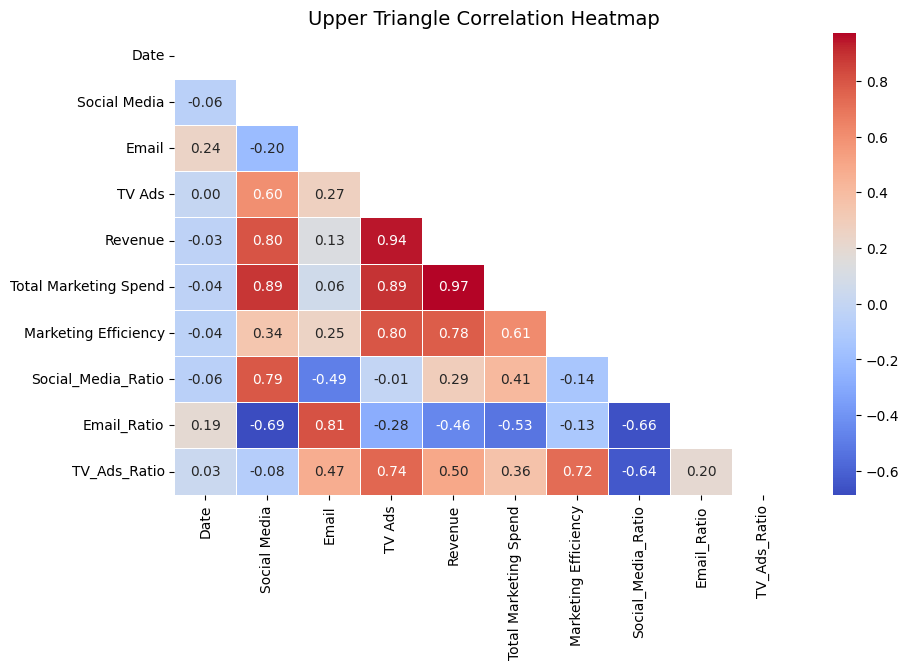

In [ ]:
# Correlation between numeric features
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = mkt_data_clean.corr()

# Create mask for upper triangle to facilitate cleaner repesenation
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap with the mask for cleaner hitmap
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Giving heatmap a meaningful title
plt.title("Upper Triangle Correlation Heatmap", fontsize=14)
plt.show()

```The correlation heatmap highlights a very strong positive relationship between total marketing spend and both revenue (r = 0.89) and TV ads (r = 0.89), suggesting that TV advertising is a major driver of total spend and a key contributor to revenue. Email spend also shows a strong correlation with revenue (r = 0.80), while social media has a moderate correlation (r = 0.60). Marketing efficiency correlates strongly with revenue (r = 0.80), validating its usefulness as a performance metric. Notably, spend ratios for each channel exhibit strong negative correlations with one another (e.g., Social Media Ratio vs Email Ratio: r = –0.66), reflecting the trade-off in budget allocation. These insights support the use of TV and email as impactful variables in regression modeling while also signaling a need to watch for multicollinearity when including all spend ratios simultaneously.```

**Histograms for numerical variables**

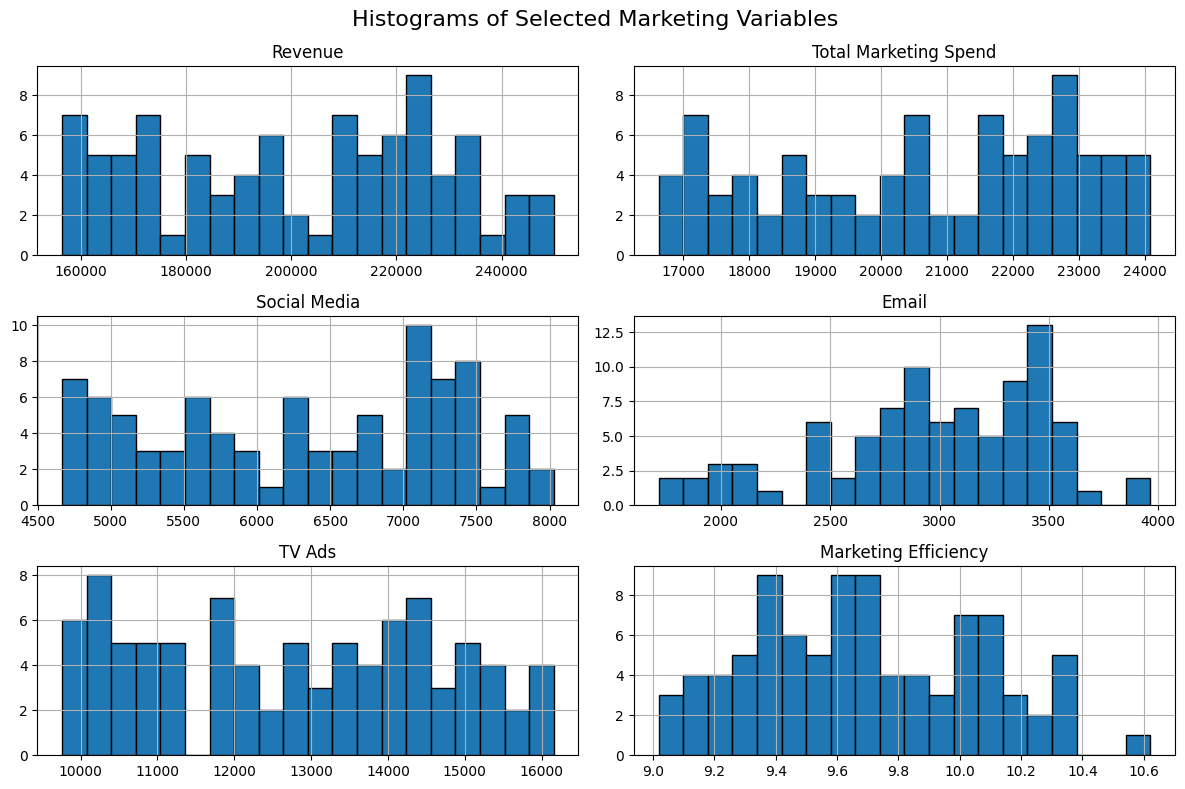

In [ ]:
import matplotlib.pyplot as plt

# List of selected variables for histograms
selected_vars = ['Revenue', 'Total Marketing Spend', 'Social Media', 'Email', 'TV Ads', 'Marketing Efficiency']

# Plot histograms only for selected variables
mkt_data_clean[selected_vars].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms of Selected Marketing Variables', fontsize=16)
plt.tight_layout()
plt.show()


```The histograms of the selected marketing variables reveal important distributional patterns. Revenue is fairly evenly spread between $160,000   and $250,000, with a slightly bimodal shape suggesting performance clustering across periods. Total marketing spend shows a wide and relatively uniform distribution, indicating varied budget allocation over time. Among the channels, email spending appears the most consistently distributed, clustering around $3,000–$3,500, while social media and TV ad spend are more dispersed, reflecting differences in campaign intensity. Marketing efficiency is concentrated between 9.4 and 10.2, suggesting that most campaigns delivered around $9.50–$10.50 in revenue per dollar spent, with a few high-performing outliers.```


**Pattern in revenue by date**

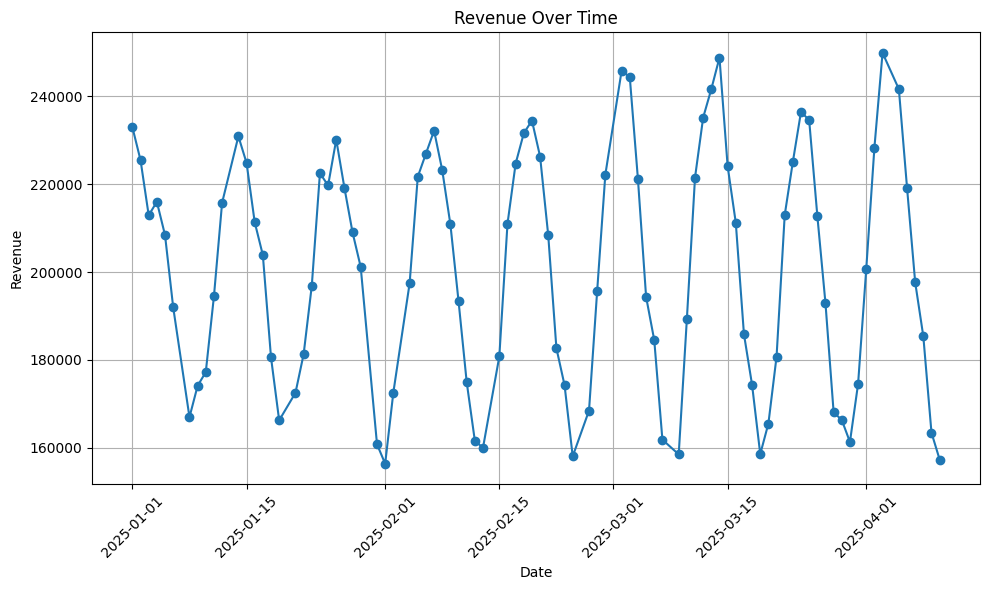

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Sort by date
mkt_data_clean = mkt_data_clean.sort_values('Date')

# Step 3: Plot revenue over time
plt.figure(figsize=(10, 6))
plt.plot(mkt_data_clean['Date'], mkt_data_clean['Revenue'], marker='o', linestyle='-')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


```The revenue trend over time displays a clear cyclical pattern, with sharp peaks and dips occurring at regular intervals, suggesting strong short-term seasonality or campaign-based fluctuations. Revenue tends to rise steeply to a high point and then drop just as quickly, which may reflect periodic marketing pushes, promotional offers, or synchronized campaign cycles. While the overall revenue level remains fairly stable across the time frame, the regular up-and-down swings imply the business may benefit from smoothing out marketing efforts or better balancing spend across time to reduce volatility.```


**Scatterplot matrix to show pairwise scatterplots**

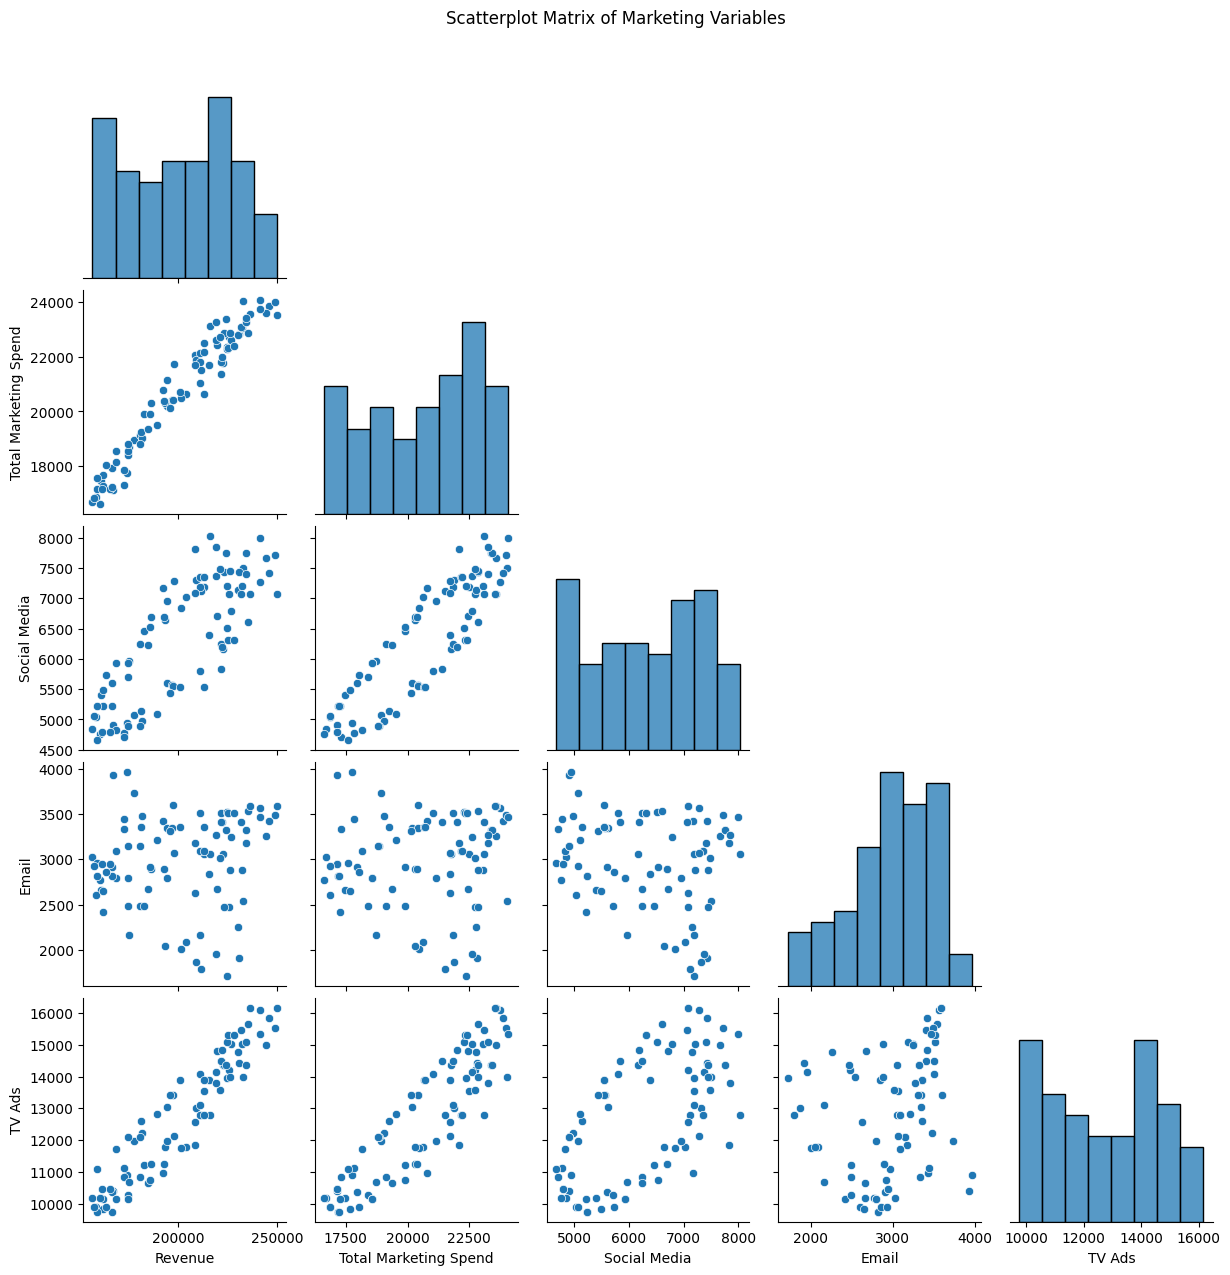

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant numeric columns
selected_vars = [
    'Revenue', 'Total Marketing Spend',
    'Social Media', 'Email', 'TV Ads',
]

# Generate the pairplot
sns.pairplot(mkt_data_clean[selected_vars], corner=True)
plt.suptitle("Scatterplot Matrix of Marketing Variables", y=1.02)
plt.show()


```The scatterplot matrix reveals a strong and nearly linear relationship between total marketing spend and revenue, highlighting total spend as a key driver of sales performance. TV ad spend also shows a strong positive correlation with both revenue and total spend, reinforcing its importance as a high-impact channel. Social media spend exhibits a moderately positive but more scattered trend with revenue, suggesting variable effectiveness across periods. In contrast, email spend shows little to no clear linear relationship with revenue or other channels, indicating it may play a more supportive or context-specific role. Overall, the visual patterns support using total spend and TV ads as primary predictors in regression modeling, while also suggesting careful consideration of potential multicollinearity between highly correlated inputs.```

**Simple linear regression model**

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1562.
Date:                Wed, 07 May 2025   Prob (F-statistic):           8.55e-58
Time:                        01:36:47   Log-Likelihood:                -914.35
No. Observations:                  90   AIC:                             1833.
Df Residuals:                      88   BIC:                             1838.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.222e+

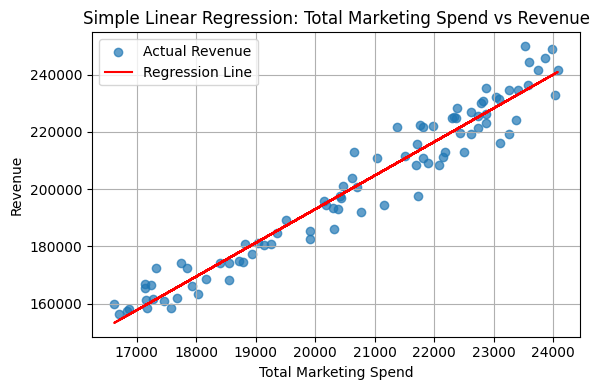

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define dependent and independent variables
X = mkt_data_clean['Total Marketing Spend']
y = mkt_data_clean['Revenue']

# Add constant (intercept term) to X
X_with_const = sm.add_constant(X)

# Build and fit the model
model = sm.OLS(y, X_with_const).fit()

# Print summary
print(model.summary())

# Predict revenue using the fitted model
y_pred = model.predict(X_with_const)

# Visualization
plt.figure(figsize=(6, 4))
plt.scatter(X, y, label='Actual Revenue', alpha=0.7)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Total Marketing Spend')
plt.ylabel('Revenue')
plt.title('Simple Linear Regression: Total Marketing Spend vs Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

```The simple linear regression model using total marketing spend as the sole predictor of revenue demonstrates a very strong relationship, with an R-squared value of 0.947 indicating that nearly 95% of the variation in revenue is explained by marketing spend alone. The coefficient of 11.76 suggests that each additional dollar spent on marketing is associated with an average increase of approximately \$11.76 in revenue. The relationship is statistically significant, as reflected by a p-value well below 0.001 and a highly significant F-statistic. While the intercept is negative, it is not practically meaningful and simply reflects the model's baseline. The Durbin-Watson statistic indicates minor positive autocorrelation in the residuals, typical in time-based data, and the high condition number is likely due to the scale of the variables rather than multicollinearity concerns. Overall, the model provides a strong and interpretable foundation for evaluating the impact of marketing investment on revenue.```


**Multiple Linear Regression**

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1183.
Date:                Wed, 07 May 2025   Prob (F-statistic):           8.88e-70
Time:                        01:36:47   Log-Likelihood:                -877.76
No. Observations:                  90   AIC:                             1764.
Df Residuals:                      86   BIC:                             1774.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6789.2256   4357.327      1.558   

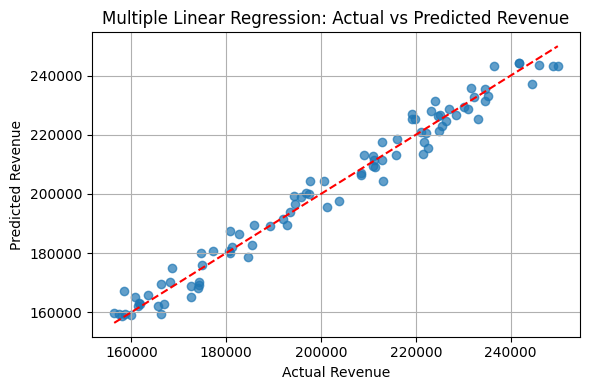

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define independent variables (multiple channels)
X_multi = mkt_data_clean[['Social Media', 'Email', 'TV Ads']]
y = mkt_data_clean['Revenue']

# Add constant term for intercept
X_multi_with_const = sm.add_constant(X_multi)

# Build and fit the model
model_multi = sm.OLS(y, X_multi_with_const).fit()

# Print summary
print(model_multi.summary())

# Predict revenue using the model
y_pred_multi = model_multi.predict(X_multi_with_const)

# Visualization: Actual vs Predicted Revenue
plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred_multi, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree reference line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Multiple Linear Regression: Actual vs Predicted Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


```The multiple linear regression model using Social Media, Email, and TV Ads as predictors of revenue yields an excellent fit, with an R-squared value of 0.976, indicating that 97.6% of the variance in revenue is explained by these three marketing channels. Both Social Media and TV Ads have statistically significant positive impacts on revenue (p < 0.001), with coefficients of approximately 10.13 and 10.13 respectively, suggesting that every additional dollar spent on either channel generates over $10 in revenue on average. In contrast, Email marketing shows an insignificant effect (p = 0.808), implying it does not contribute meaningfully to revenue in this dataset. The intercept is not statistically significant and does not hold practical relevance. While the model demonstrates strong explanatory power, the high condition number (1.42e+05) suggests possible multicollinearity or scale-related issues, which may warrant further investigation or normalization.```


**Interpretation of Coefficients (ROI Insight):**

```
TV Ads:
Coefficient = 10.13
For every additional $1 spent on TV ads, revenue increases by $10.13.
High ROI and statistically significant → Top-performing channel.

Social Media:
Coefficient = 10.13
For every additional $1 spent on Social Media, revenue increases by $10.13.
High ROI and statistically significant → Also top-performing channel.

Email:
Coefficient = 0.26
For every additional $1 spent on Email, revenue increases by only $0.26.
Not statistically significant → Low ROI and unreliable effect.
```

**Recommendations for Optimizing Marketing Spend:**

```
Prioritize TV Ads and Social Media:
Allocate more budget to these channels as they have the highest ROI.

Reduce or Reallocate Email Spend:
Consider cutting back on Email campaigns or redesigning their strategy.

Monitor for Diminishing Returns:
Even high-ROI channels can saturate — analyze for diminishing returns over time.

Test and Reassess Email Strategy:
Before eliminating Email, run A/B tests or segment audiences to explore improvements.
```

**Additional steps**

**Check for Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
X = mkt_data_clean[['Social Media', 'Email', 'TV Ads']]
X = sm.add_constant(X)
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)

       Variable        VIF
0         const  94.228097
1  Social Media   2.007038
2         Email   1.390320
3        TV Ads   2.082809


```
| Variable         | VIF   | Interpretation                                                |
| ---------------- | ----- | ------------------------------------------------------------- |
| **Social Media** | 2.01  | Low multicollinearity — acceptable                            |
| **Email**        | 1.39  | Very low multicollinearity — good                             |
| **TV Ads**       | 2.08  | Low multicollinearity — acceptable                            |
| **const**        | 94.23 | Ignore — high VIF for intercept is expected and not a concern |
```

**Residual Analysis**

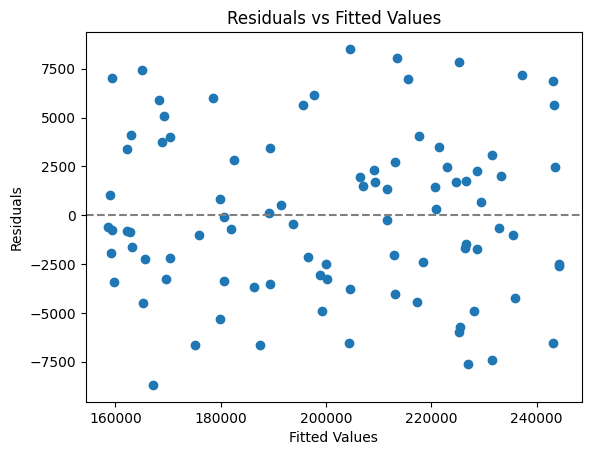

In [ ]:
import matplotlib.pyplot as plt

residuals = model_multi.resid
fitted = model_multi.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

```
The residuals are randomly scattered around the horizontal line at zero, with no clear pattern or funnel shape.

This suggests that the model’s assumptions of linearity constant variance of errors are met.

There is no evidence of systematic bias, meaning your regression model is well-specified.

A few residuals fall outside ±7500, but there are no extreme outliers or influential points that would raise concern.

```